In [1]:
import rasterio
import numpy as np
print(rasterio.__version__, rasterio.__gdal_version__)
import rasterio.plot
import rasterio.warp
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from glob import glob
from shapely import LineString, Point
plt.rcParams["figure.figsize"] = (10, 10)
filename = "/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif"

1.3.6 3.7.0


In [2]:
sidecars = glob(filename + "*")
sidecars

['/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif.xml',
 '/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif.aux.xml',
 '/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif.ovr',
 '/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif']

In [3]:
image = rasterio.open(filename)
print(image.profile)
print(image.gcps)
print(len(image.gcps[0]))
print(image.transform)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8755, 'height': 15248, 'count': 3, 'crs': None, 'transform': Affine(0.5, 0.0, 1731264.2695891531,
       0.0, -0.5, 6033438.222605281), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
([GroundControlPoint(row=6033275.188947188, col=1734593.8159004494, x=1734588.6874737586, y=6033276.4798835935, z=0.0, id='', info=''), GroundControlPoint(row=6028889.88236001, col=1732654.461878724, x=1732653.072192807, y=6028888.29919759, z=0.0, id='', info=''), GroundControlPoint(row=6031537.064717166, col=1734479.0171732393, x=1734475.2612538475, y=6031538.249455748, z=0.0, id='', info=''), GroundControlPoint(row=6032464.9146395875, col=1735422.68305726, x=1735419.3441003484, y=6032464.8089130325, z=0.0, id='', info=''), GroundControlPoint(row=6028271.800327371, col=1732402.3487712448, x=1732399.5743941455, y=6028270.945671238, z=0.0, id='', info=''), GroundControlPoint(row=6026116.970775399, 

In [4]:
# Rectified with ArcGIS Pro
rectified_image = rasterio.open("MarsdenPoint_03MAY2021.tif")
print(rectified_image.profile)
print(rectified_image.gcps)
print(rectified_image.transform)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8755, 'height': 15249, 'count': 3, 'crs': CRS.from_wkt('PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",GEOGCS["NZGD2000",DATUM["New_Zealand_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6167"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4167"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",173],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1600000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","2193"]]'), 'transform': Affine(0.5057623927062883, 0.0, 1731211.362876743,
       0.0, -0.5033555417610198, 6033491.076777533), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
([], None)
| 0.51, 0.00, 1731

In [5]:
# Created with gdalwarp -tps /mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Imagery/Stack/MarsdenPoint_03MAY2021.tif test_tps.tif
tps_image = rasterio.open("test_tps.tif")
print(tps_image.profile)
print(tps_image.gcps)
print(tps_image.transform)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8777, 'height': 15265, 'count': 3, 'crs': CRS.from_epsg(2193), 'transform': Affine(1.0004640394690094, 0.0, 8350.919651031494,
       0.0, -1.0004640394690094, 6782.755300521851), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
([], None)
| 1.00, 0.00, 8350.92|
| 0.00,-1.00, 6782.76|
| 0.00, 0.00, 1.00|


In [6]:
print("image.transform:", image.transform)
print("from_gcps:", rasterio.transform.from_gcps(image.gcps[0]))
print("dot product:", image.transform * rasterio.transform.from_gcps(image.gcps[0]))

image.transform: | 0.50, 0.00, 1731264.27|
| 0.00,-0.50, 6033438.22|
| 0.00, 0.00, 1.00|
from_gcps: | 1.00,-0.00, 1657.97|
| 0.00, 1.00,-180.89|
| 0.00, 0.00, 1.00|
dot product: | 0.50,-0.00, 1732093.25|
|-0.00,-0.50, 6033528.67|
| 0.00, 0.00, 1.00|


(6026032.483407501, 6026432.488226468)

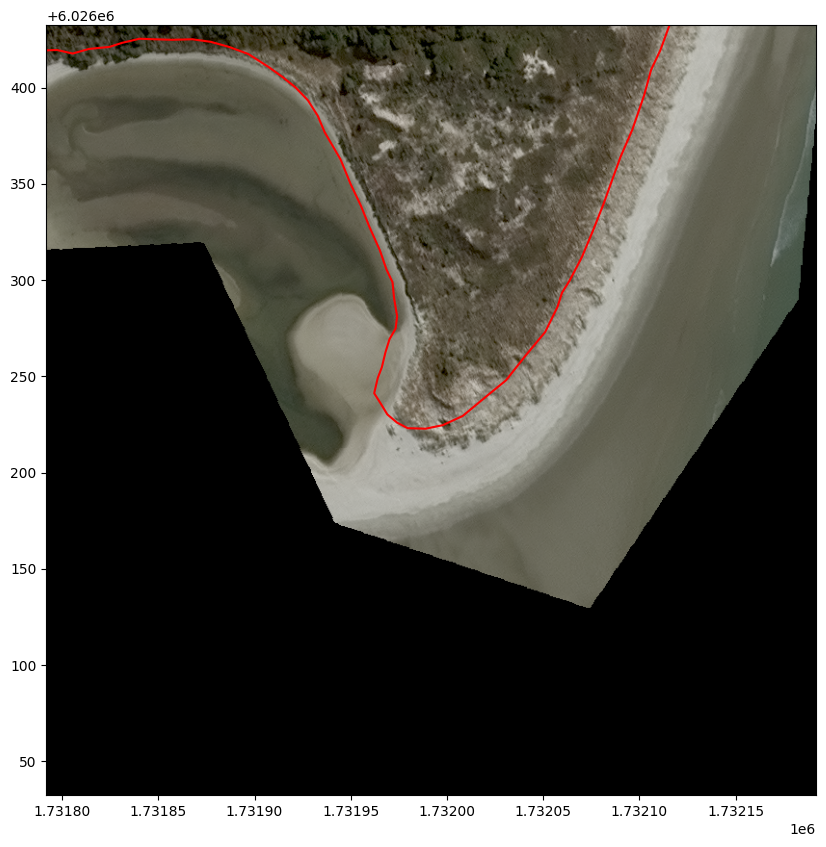

In [7]:
# Affine interpretation of GCPs
fig, ax = plt.subplots()
rasterio.plot.show(image, ax=ax)

shoreline = gpd.read_file("/mnt/retrolens/MaxarImagery/HighFreq/Northland/MarsdenPoint/Shorelines/MarsdenPoint_03MAY2021.shp")
shoreline.plot(color="red", ax=ax)

xlim = [1731791.7359674843, 1732191.7407864514]
ylim = [6026032.483407501, 6026432.488226468]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

(6026032.483407501, 6026432.488226468)

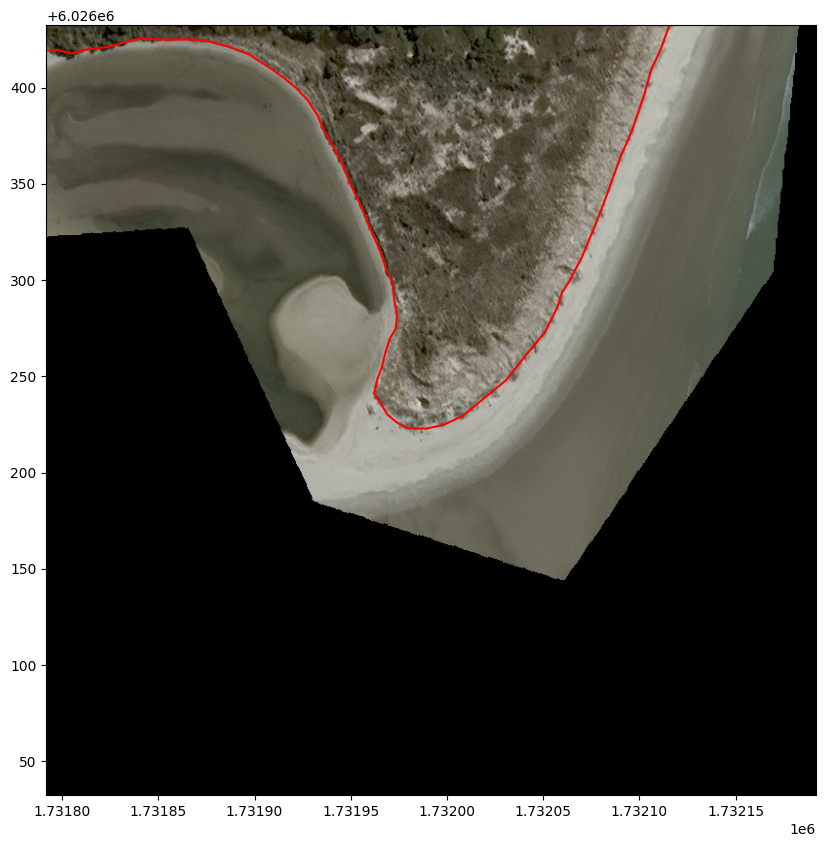

In [8]:
# 2nd order polynomial transformation from 12 GCPs
fig, ax = plt.subplots()
rasterio.plot.show(rectified_image, ax=ax)

shoreline.plot(color="red", ax=ax)
xlim = [1731791.7359674843, 1732191.7407864514]
ylim = [6026032.483407501, 6026432.488226468]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

(6026032.483407501, 6026432.488226468)

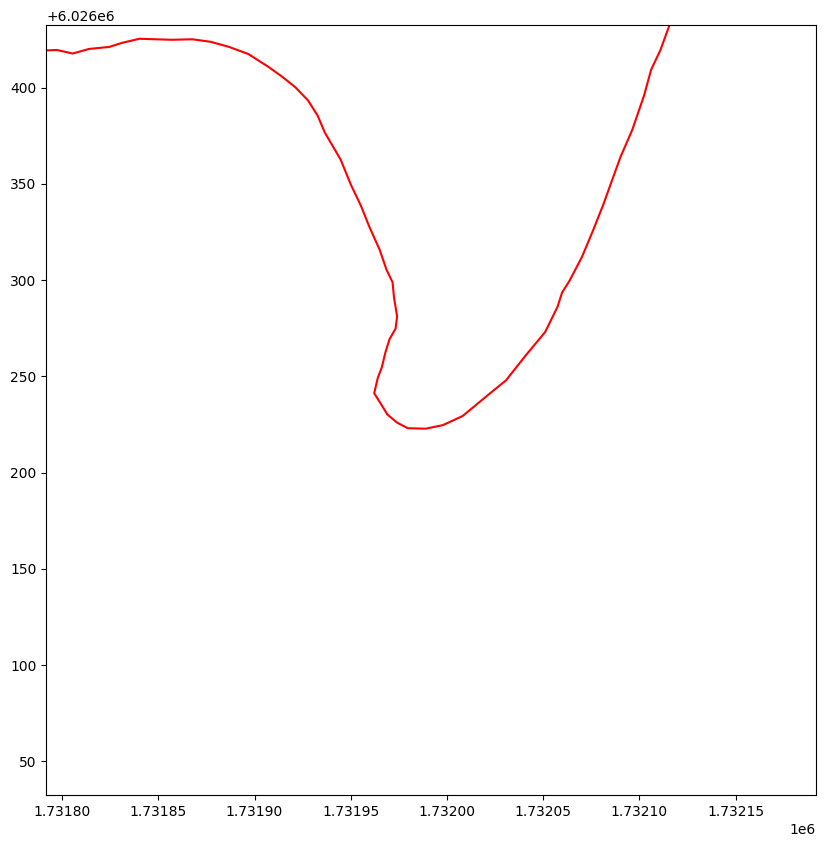

In [9]:
# thin plate spline transformer based on available GCPs
fig, ax = plt.subplots()
rasterio.plot.show(tps_image, ax=ax)

shoreline.plot(color="red", ax=ax)
xlim = [1731791.7359674843, 1732191.7407864514]
ylim = [6026032.483407501, 6026432.488226468]
ax.set_xlim(xlim)
ax.set_ylim(ylim)